# Capstone Project - Car Accident Severity (Week 2) 
## Python Notebook 

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Preparation](#data)
* [Methodology](#methodology)
* [Exploratory Data Analysis](#e)
* [Modeling, Testing and Evaluation](#m)
* [Results and Discussion](#r)
* [Conclusion and Outlook](#c)

## Introduction: Business Problem <a name="introduction"></a>

### 1.1. Background

### 1.1. Background

Road traffic injuries (RTIs) are a major public health problem. The annual global status reports on road safety, launched by the World Health Organization (WHO), highlights that the number of road traffic deaths has exceeded one million in recent years. That is over 3000 people dying on the world's roads every day.[1] Therefore, analyzing the various factors that could help predict accident severity can guide the government administration to implement changes in a timely manner that may reduce the number of fatalities & serious injuries.

In the past few years, the volume of research in the areas of accident analysis and prediction has been increasing. Among the analytical data mining solutions, supervised machine learning (ML), has become a popular scientific method to predict the severity of accidents. The reasons for this popularity, can be referred to the capacity present in ML to identify the existing patterns in the data and make predictions via the establishment and evaluation of diverse algorithms. Moreover, the ability of MLs to handle large amounts of data is an additional asset for this purpose, as the data on road traffic accidents are often sparse and largely extended.

### 1.2. Objective
The objective of this capstone project is to analyze the collision data set for Seattle, WA and determine the most possible factors including weather, road conditions, visibility, and various other factors that best predict accident severity by training and evaluating supervised machine learning algorithms. 

This project will be used to answer the business question: How can the city of Seattle, Washington best predict the severity of collisions that occur and what avenues can be
explored to remedy this issue?


### 1.3. Target Audience 
The report of this project can be targeted to stakeholders, who are involved with road traffic injuries, such as road administrators, traffic control authorities, and emergency road services in order to help them predict the car accident severities and improve the road users' safety margins.



### References 
[1].World Health Organization: http://www.who.int 





## Data Preparation <a name="data"></a>

It is now time to understand the data and then prepare it to be fed into the modeling tools. The given dataset used in this project (provided by the coursera example data ) can be downloaded here: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 

The example dataset (Data-Collisions.csv) contains 194673 and 38 columns including the labeled
data.


Lets first load required libraries:

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

Load Data From CSV File  

In [5]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/Users/ZhouHui/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Let's see how unbalanced the dataset is.

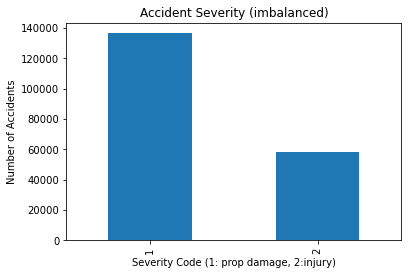

In [12]:
df.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: prop damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (imbalanced)') 
plt.savefig('figure1_distribution(imbalanced).png')

In [8]:
#Getting the number of missing values in each column
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [9]:
# Oversampling
# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=136485,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.SEVERITYCODE.value_counts()

2    136485
1    136485
Name: SEVERITYCODE, dtype: int64

### Balancing the Dataset

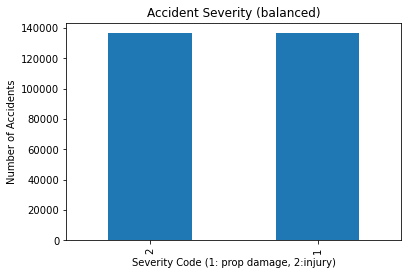

In [11]:
# Let's see how balanced the dataset using oversmapling looks.
df_upsampled.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: prop damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (balanced)') 
plt.savefig('figure2_distribution(balanced).png')

In [ ]:
# Rename X and Y with Longitude and Latitude 
df1 = df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
df1.head()

### Feature Selection

In [ ]:
# Drop LOCATION; Langitude and Latitude used instead.
# Two copies of SEVERITYCODE exist, drop the second SEVERITYCODE.1
#Drop columns incluidng codes: OBJECTID, INCKEY, COLDETKEY, REPORTNO,INTKEY,EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM --->
#ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY 
#Drop redundant infos: STATUS, EXCEPTRSNDESC, INCDATE , INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT,ST_COLDESC, UNDERINFL--->
#PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE  
df2 = df1.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
df2.head()

In [ ]:
#Getting the type of each column
df2.dtypes

In [ ]:
#Getting the shape of the data frame
df2.shape

In [ ]:
#Getting the name of each column
df2.columns

In [ ]:
df2.isna().sum()

In [ ]:
#Returning the objects containing counts of unique values
df2['WEATHER'].value_counts()

### Handling of missing Values

In [ ]:
# Replacing NaN value by Unknown
df2['WEATHER'].replace(np.NaN, "Unknown", inplace=True)

In [ ]:
# Replacing Unknown and Other by Clear, the most frequent value of the column
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df2.replace(encoding_WEATHER, inplace=True)
df2['WEATHER'].value_counts()

In [ ]:
df2['SPEEDING'].value_counts()

In [ ]:
# Replacing NaN value by N
df2['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [ ]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_SPEEDING, inplace=True)
df2['SPEEDING'].value_counts()

In [ ]:
df2['LIGHTCOND'].value_counts()

In [ ]:
# Replacing NaN value by Unknown
df2['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [ ]:
# Replacing Unknown and Other by Daylight, the most frequent value of the column
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df2.replace(encoding_LIGHTCOND, inplace=True)
df2['LIGHTCOND'].value_counts()

In [ ]:
df2['ROADCOND'].value_counts()

In [ ]:
# Replacing NaN value by Unknown
df2['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [ ]:
# Replacing Unknown and Other by Dry, the most frequent value of the column
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df2.replace(encoding_ROADCOND, inplace=True)
df2['ROADCOND'].value_counts()

In [ ]:
df2['JUNCTIONTYPE'].value_counts()

In [ ]:
# Replacing NaN value by Unknown
df2['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [ ]:
# Replacing Unknown by Mid-Block (not related to intersection), the most frequent value of the column
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df2.replace(encoding_JUNCTIONTYPE, inplace=True)
df2['JUNCTIONTYPE'].value_counts()

In [ ]:
df2['LONGITUDE'].value_counts()

In [ ]:
# NaN values are placed by the mean values of the column
avg_LONGITUDE = df2["LONGITUDE"].astype("float").mean(axis=0)
print("Average of LONGITUDE:", avg_LONGITUDE)
df2['LONGITUDE'].replace(np.NaN, avg_LONGITUDE, inplace=True)

In [ ]:
df2['LATITUDE'].value_counts()

In [ ]:
# NaN values are placed by the mean values of the column
avg_LATITUDE = df2["LATITUDE"].astype("float").mean(axis=0)
print("Average of LATITUDE:", avg_LATITUDE)
df2['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

In [ ]:
# 1:prop damage   2:injury
df2['SEVERITYCODE'].value_counts()

In [ ]:
df2['INATTENTIONIND'].value_counts()

In [ ]:
#Replacing NaN value by N
df2['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)

In [ ]:
encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_INATTENTIONIND, inplace=True)
df2['SPEEDING'].value_counts()

In [ ]:
df2.isna().sum()

In [ ]:
#Tabulating the first five rows
df2.head()

In [ ]:
df2.columns

## Methodology<a name="methodology"></a>

After the features are selected, they are employed for an explanatory data analysis to figure out more about their effects. The focus is on identifying the feature
conditions that have a bigger effect on the severity which leads to injuries. To do so, the dataset is
filtered further and the corresponding values of features are sorted.

In the next step, the features are processed for predictive modeling analysis. 4 machine learning models are created using the classification techniques as listed below:

* K-Nearest Neighbors (KNN)
* Decision Tree
* Logistic Regression
* Random Forest

The created models are tested and then evaluated based on their accuracy score to find the more accurate model.

## Exploratory Data Analysis <a name="e"></a>

### The map with markers of the accident locations in Seattle 

In [ ]:
#Installing Folium Package for mapping
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

In [ ]:
#Visualizing 300 data points on the map
limit = 300
df_m1 = df2[["LATITUDE", "LONGITUDE"]]
df_m2 = df_m1.iloc[0:limit, :]

In [ ]:
# Instantiate a feature group for the incidents in the dataframe

Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

incidents = folium.map.FeatureGroup()

# loop through the 300 points and add each to the incidents feature group
for lat, lng, in zip(df_m2.LATITUDE, df_m2.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Seattle_map.add_child(incidents)

In [ ]:
#Selecting the severity code of 2 i.e. with injuries and making  another data frame for this purpose
Sev_2 = df2.loc[df2['SEVERITYCODE']==2]
Sev_2.head()

### Relationship between the weather conditions and the accident severity with injury

In [ ]:
Sev_2_w = Sev_2['WEATHER'].value_counts()
Sev_2_w

In [ ]:
labels = 'Clear', 'Raining', 'Overcast', 'Other'
sizes = [37856, 11176, 8745, sum(Sev_2_w[3:9])]
explode = (0.1,0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Weather Conditions on the Severity with Injury', y=1.05)
plt.show()

### Relationship between the person count and the accident severity with injury

In [ ]:
Sev_2_p = Sev_2['PERSONCOUNT'].value_counts()
Sev_2_p

In [ ]:
labels = 2, 3, 4, 1, 5, 0, 6, '>6'
sizes = [27811, 13461, 6295, 3296, 2969, 1762, 1357, sum(Sev_2_p[3:9])]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Person count on the Severity with Injury', y=1)
plt.show()

### Relationship between the vehicle count and the accident severity with injury

In [ ]:
Sev_2_v = Sev_2['VEHCOUNT'].value_counts()
Sev_2_v

In [ ]:
labels = 2, 1, 3, 0, 4,'>4'
sizes = [35949, 14105, 5470, 1227, 1078, sum(Sev_2_p[5:12])]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Vehicle count on the Severity with Injury', y=1.05)
plt.show()

### Relationship between the junction type and the accident severity with injury

In [ ]:
Sev_2_j = Sev_2['JUNCTIONTYPE'].value_counts()
Sev_2_j

In [ ]:
labels = 'At Iintersection_intersection related', 'Mid-Block_not intersection related', 'Mid-Block with intersection', 'Driveway Junction', 'Other'
sizes = [27174, 19806, 7297, 3234, sum(Sev_2_j[4:6])]
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Junction type on the Severity with Injury', y=1.05)
plt.show()

### Relationship between the inattention and the accident severity with injury

In [ ]:
Sev_2_i = Sev_2['INATTENTIONIND'].value_counts()
Sev_2_i

In [ ]:
labels = 'No', 'Yes'
sizes = [47791, 10397]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Inattention on the Severity with Injury', y=1)
plt.show()

### Relationship between the road conditions and the accident severity with injury

In [ ]:
Sev_2_r = Sev_2['ROADCOND'].value_counts()
Sev_2_r

In [ ]:
labels = 'dry', 'wet', 'ic, sand, oil, standing water'
sizes = [41916, 15755, sum(Sev_2_r[2:7])]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Road condition on the Severity with Injury', y=1.05)
plt.show()

### Relationship between the light conditions and the accident severity with injury

In [ ]:
Sev_2_l = Severity_2['LIGHTCOND'].value_counts()
Sev_2_l

In [ ]:
labels = 'day light', 'dark'
sizes = [40291, 17897]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Light condition on the Severity with Injury', y=1)
plt.show()

### Relationship between the speeding and the accident severity with injury

In [ ]:
Sev_2_s = Severity_2['SPEEDING'].value_counts()
Sev_2_s

In [ ]:
labels = 'No', 'Yes'
sizes = [54657, 3531]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Speeding condition on the Severity with Injury', y=1)
plt.show()

## Modeling, Testing and Evaluation <a name="m"></a>

In [ ]:
#Making a new data frame
Feature = df2[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [ ]:
X = Feature

In [ ]:
y = df2['SEVERITYCODE'].values

### Normalize Data

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [ ]:
#Splitting the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

### K-Nearest Neighbours (KNN)

In [ ]:
#Finding the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNNeigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "Best k =", mean_acc.argmax()+1) 

In [ ]:
#Building the model using the best k 
k=8
kNNeigh= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kNNeigh

In [ ]:
#Evalaution
print("K-Nearest Neighbours Accuray: ", metrics.accuracy_score(y_test, yhat))

### Decision Tree

In [ ]:
#Modeling
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree.fit(X_train,y_train)

In [ ]:
#Prediction
yhat = DTree.predict(X_test)
yhat

In [ ]:
#Evalaution
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

### Logistic Regression

In [ ]:
#Modeling
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
#Prediction
yhat = LR.predict(X_test)
yhat

In [ ]:
#Evalaution
print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, yhat))

### Random Forest

In [ ]:
#Modeling
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

In [ ]:
#Prediction
yhat =clf.predict(X_test) 

In [ ]:
#Evalaution
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, yhat))

### Visualize important features using Random Forest

In [ ]:
# Create a list of feature names
feat_labels = ['SEVERITYCODE', 'LONGITUDE', 'LATITUDE','PERSONCOUNT', 
               'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND',
               'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']
# Set the target for the prediction
target='SEVERITYCODE'

# Create arrays for the features and the response variable

# set X and y
y = df2[target]
X = df2.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Results and Discussion <a name="r"></a> 

### Plot the accuracy score versus algorithm

In [ ]:
algo_lst =['K-Nearest Neighbors','Decision Trees','Logistic Regression','Random Forest']

accuracy_lst = [0.7267753948889174, 0.7429562090663927, 0.7030949017593425, 0.711878772312829]

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Accuracy Score versus Algorithm')

plt.show()

Comparing the score of accuracies obtained by the algorithms K-Nearest Neighbors, Decision Tree, Logistic Regression, and Random Forest, the decision tree has been proved to give better accuracy. 

During the modeling with the K-Nearest Neighbors classifier, it was observed that the computer required much more time.  But it took less time to execute the decision tree modeling. This can also represent better effectiveness and compatibility of the decision tree for handling this given dataset.  

## Conclusion and Outlook <a name="c"></a> 

In this study, supervised machine learning is employed to predict car accident severity. The imbalanced dataset is firstly balanced, and the raw data is understood and prepared in different steps to be used for the predictive modeling analysis. In parallel, an explanatory data analysis is done to gain more insight into the relationship between the features and the severity of the accidents.

Four machine learning algorithms (K-Nearest Neighbors, Decision Trees, Logistic Regression, and Random Forest) are applied in which the decision tree has shown better compatibility with the dataset, resulting in higher accuracy (0.74).

One idea for future work can be developing the decision tree machine learning model to improve its accuracy further. Adding more data to the dataset can help to compensate for the missing values. Gathering more data about other parameters such as the age of the drivers can also help to gain a more detailed insight into the car accident severity.